Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../data/ping_pong/'

NMSG = 1_500_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}10/ping_pong_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}10/ping_pong_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}10/ping_pong_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}10/ping_pong_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Thu Mar 27 12:52:01 2025 +0100) (509.90ms ela...,0.383,0.0387,0.610,2.45,0.19,12.76,53.84 C,Nominal
1,(Thu Mar 27 12:52:01 2025 +0100) (508.34ms ela...,1.390,0.0784,0.726,2.53,0.40,31.05,53.39 C,Nominal
2,(Thu Mar 27 12:52:02 2025 +0100) (507.21ms ela...,0.246,0.0306,0.569,1.14,0.17,11.95,53.39 C,Nominal
3,(Thu Mar 27 12:52:02 2025 +0100) (508.90ms ela...,0.239,0.0229,0.394,0.96,0.17,12.35,52.91 C,Nominal
4,(Thu Mar 27 12:52:03 2025 +0100) (509.55ms ela...,0.241,0.0246,0.393,0.96,0.18,12.79,52.91 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(23694, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Thu Mar 27 12:52:13 2025 +0100) (1008.41ms el...,33.2,0.0520,0.742,34.11,3.81,98.12,51.88 C,Nominal
1,(Thu Mar 27 12:52:14 2025 +0100) (1005.25ms el...,32.6,0.0197,0.471,33.32,3.78,98.61,55.91 C,Nominal
2,(Thu Mar 27 12:52:15 2025 +0100) (1005.77ms el...,34.1,0.0231,0.512,34.93,3.88,99.53,59.18 C,Nominal
3,(Thu Mar 27 12:52:16 2025 +0100) (1005.27ms el...,32.4,0.0268,0.492,33.20,3.76,99.54,61.74 C,Nominal
4,(Thu Mar 27 12:52:17 2025 +0100) (1004.54ms el...,34.1,0.0134,0.454,34.81,3.83,99.60,63.64 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 28 05:03:49 2025 +0100) (510.77ms ela...,0.0581,0.0000,0.239,0.10,0.04,2.44,43.13 C,Nominal
1,(Fri Mar 28 05:03:50 2025 +0100) (509.36ms ela...,0.1150,0.0391,0.327,0.26,0.06,3.94,43.62 C,Nominal
2,(Fri Mar 28 05:03:50 2025 +0100) (508.04ms ela...,1.1100,0.0000,0.294,1.23,0.22,18.54,43.62 C,Nominal
3,(Fri Mar 28 05:03:51 2025 +0100) (507.97ms ela...,0.5590,0.0000,0.440,0.84,0.38,31.46,43.65 C,Nominal
4,(Fri Mar 28 05:03:51 2025 +0100) (508.35ms ela...,0.0630,0.0000,0.251,0.10,0.03,2.30,43.65 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(10879, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Mar 28 05:04:01 2025 +0100) (1009.61ms el...,12.4,0.00000,0.262,12.87,1.02,99.62,47.60 C,Nominal
1,(Fri Mar 28 05:04:02 2025 +0100) (1007.06ms el...,12.3,0.00000,0.258,12.78,1.01,99.68,50.84 C,Nominal
2,(Fri Mar 28 05:04:03 2025 +0100) (1007.56ms el...,17.2,0.00000,0.427,17.73,1.62,98.56,53.23 C,Nominal
3,(Fri Mar 28 05:04:04 2025 +0100) (1007.12ms el...,12.4,0.00000,0.259,12.86,1.01,99.62,55.18 C,Nominal
4,(Fri Mar 28 05:04:05 2025 +0100) (1006.98ms el...,13.1,0.00321,0.335,13.65,1.11,98.91,56.38 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-27 12:52:01,0.383,0.0387,0.610,2.45,0.19,12.76,53.84,Nominal,509.90
1,2025-03-27 12:52:01,1.390,0.0784,0.726,2.53,0.40,31.05,53.39,Nominal,508.34
2,2025-03-27 12:52:02,0.246,0.0306,0.569,1.14,0.17,11.95,53.39,Nominal,507.21
3,2025-03-27 12:52:02,0.239,0.0229,0.394,0.96,0.17,12.35,52.91,Nominal,508.90
4,2025-03-27 12:52:03,0.241,0.0246,0.393,0.96,0.18,12.79,52.91,Nominal,509.55


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(23694, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-27 12:52:13,33.2,0.0520,0.742,34.11,3.81,98.12,51.88,Nominal,1008.41
1,2025-03-27 12:52:14,32.6,0.0197,0.471,33.32,3.78,98.61,55.91,Nominal,1005.25
2,2025-03-27 12:52:15,34.1,0.0231,0.512,34.93,3.88,99.53,59.18,Nominal,1005.77
3,2025-03-27 12:52:16,32.4,0.0268,0.492,33.20,3.76,99.54,61.74,Nominal,1005.27
4,2025-03-27 12:52:17,34.1,0.0134,0.454,34.81,3.83,99.60,63.64,Nominal,1004.54


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-28 05:03:49,0.0581,0.0000,0.239,0.10,0.04,2.44,43.13,Nominal,510.77
1,2025-03-28 05:03:50,0.1150,0.0391,0.327,0.26,0.06,3.94,43.62,Nominal,509.36
2,2025-03-28 05:03:50,1.1100,0.0000,0.294,1.23,0.22,18.54,43.62,Nominal,508.04
3,2025-03-28 05:03:51,0.5590,0.0000,0.440,0.84,0.38,31.46,43.65,Nominal,507.97
4,2025-03-28 05:03:51,0.0630,0.0000,0.251,0.10,0.03,2.30,43.65,Nominal,508.35


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(10879, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-28 05:04:01,12.4,0.00000,0.262,12.87,1.02,99.62,47.60,Nominal,1009.61
1,2025-03-28 05:04:02,12.3,0.00000,0.258,12.78,1.01,99.68,50.84,Nominal,1007.06
2,2025-03-28 05:04:03,17.2,0.00000,0.427,17.73,1.62,98.56,53.23,Nominal,1007.56
3,2025-03-28 05:04:04,12.4,0.00000,0.259,12.86,1.01,99.62,55.18,Nominal,1007.12
4,2025-03-28 05:04:05,13.1,0.00321,0.335,13.65,1.11,98.91,56.38,Nominal,1006.98


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


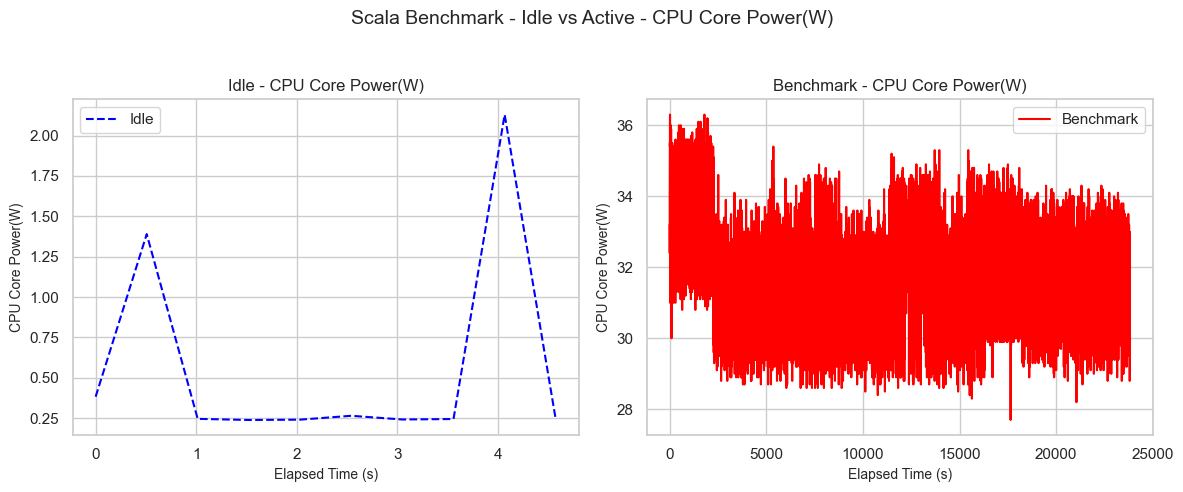

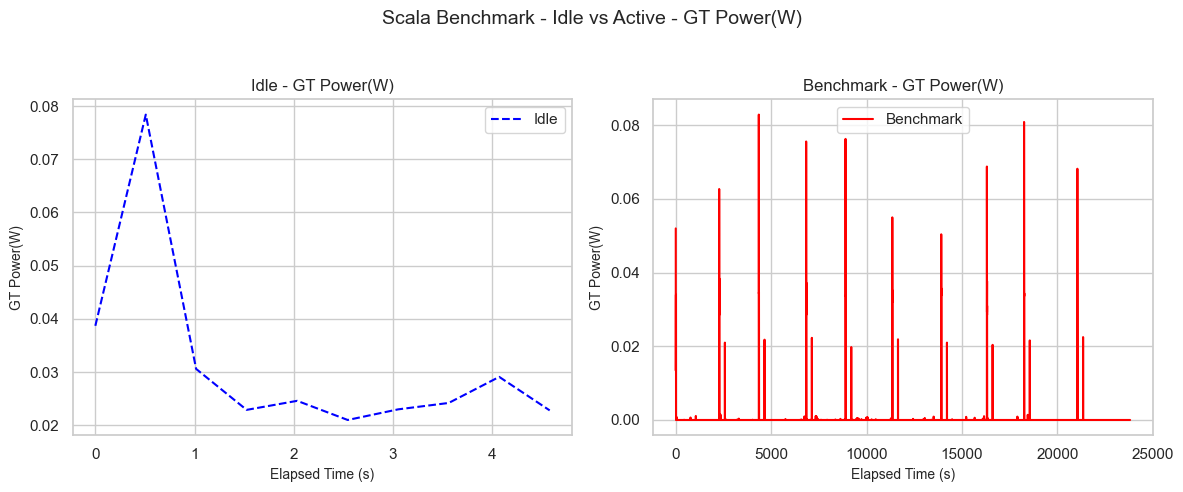

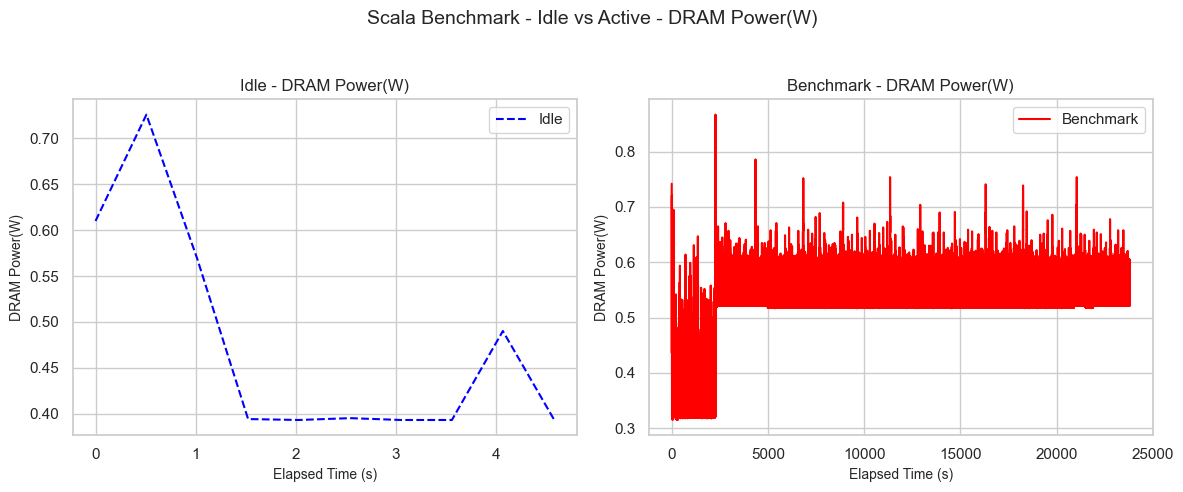

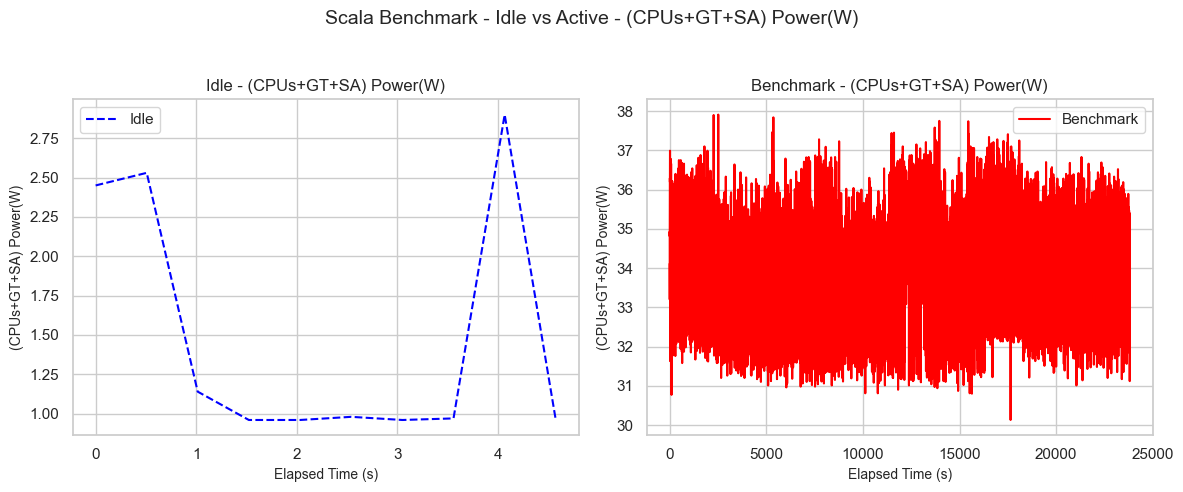

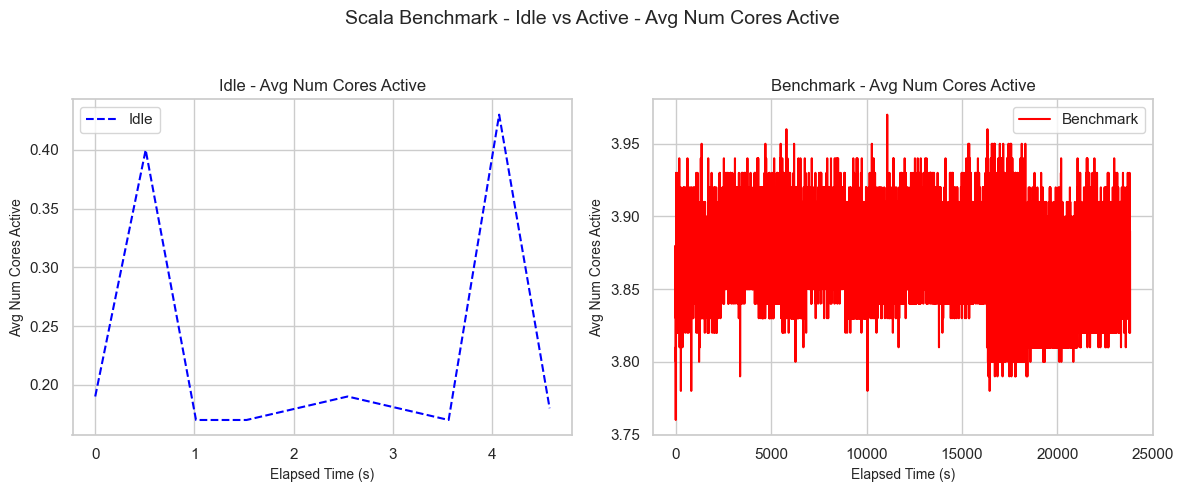

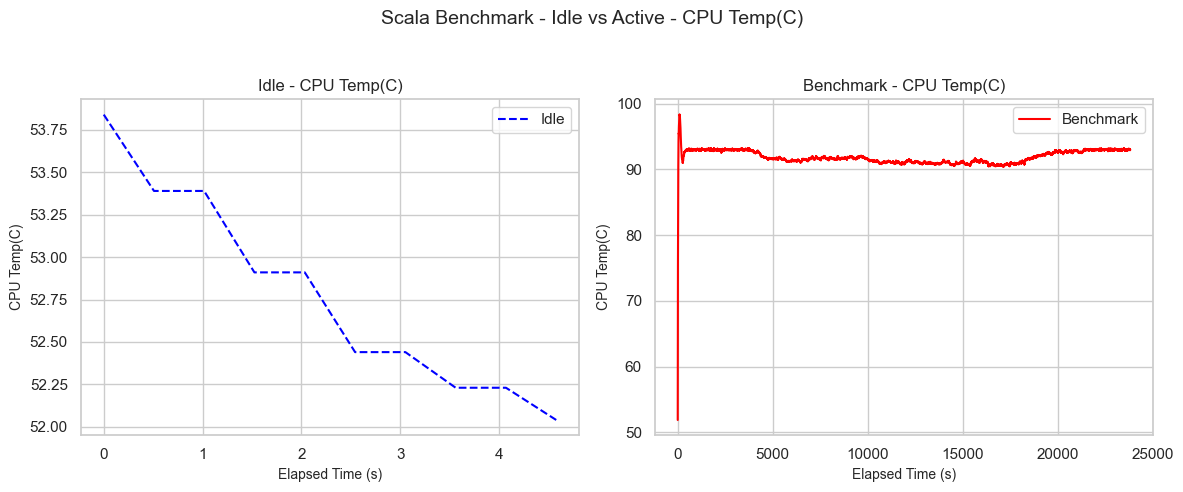

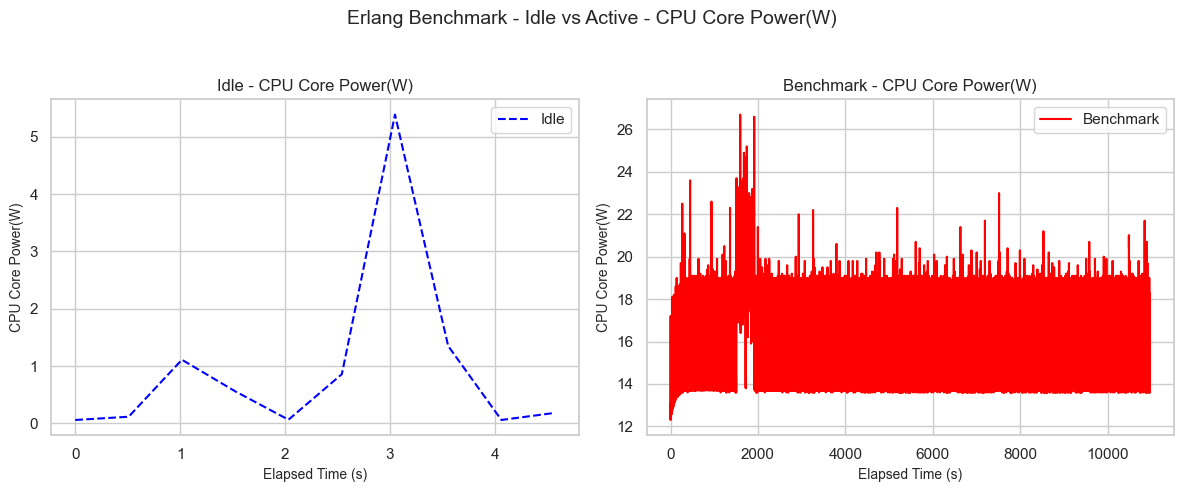

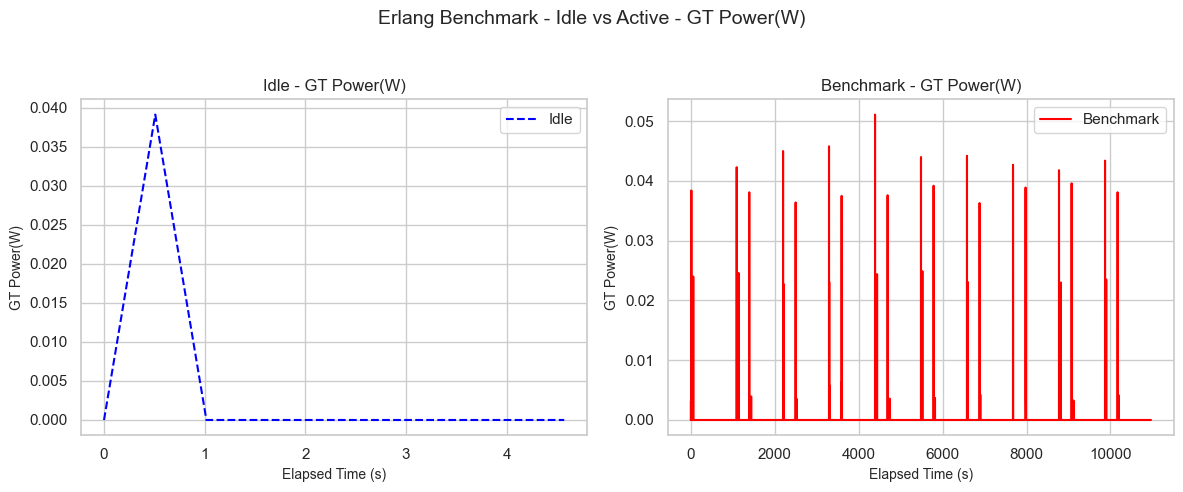

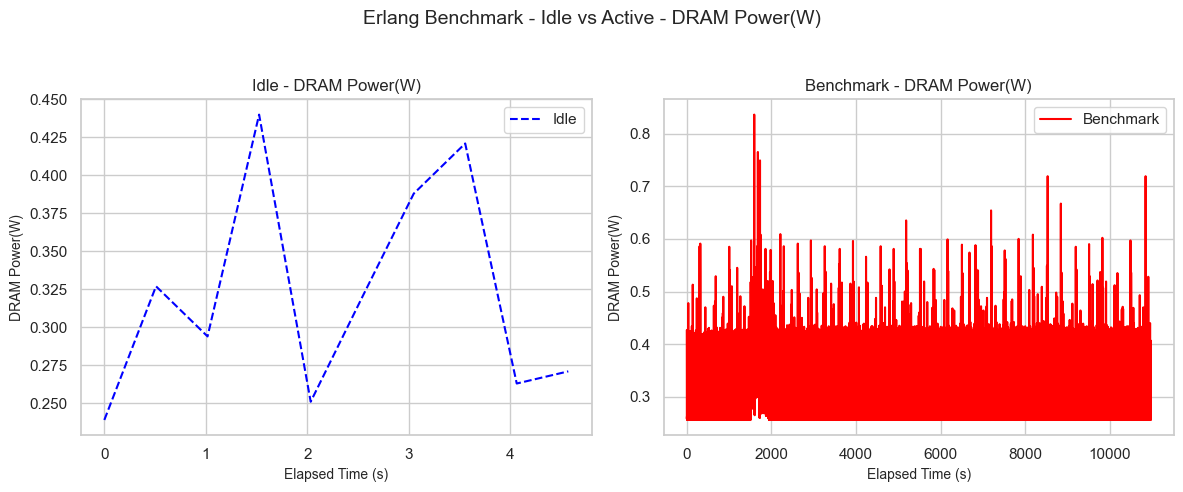

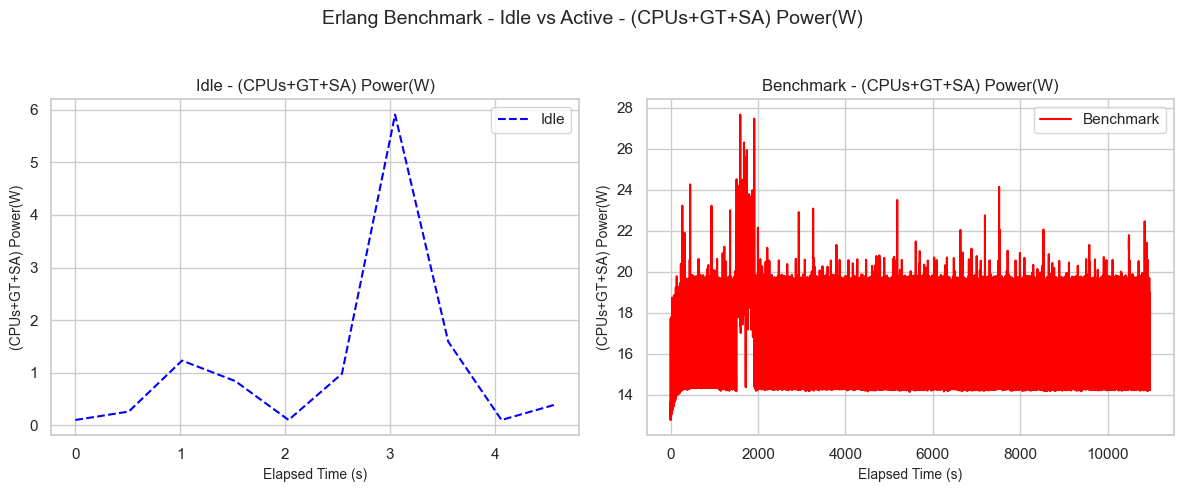

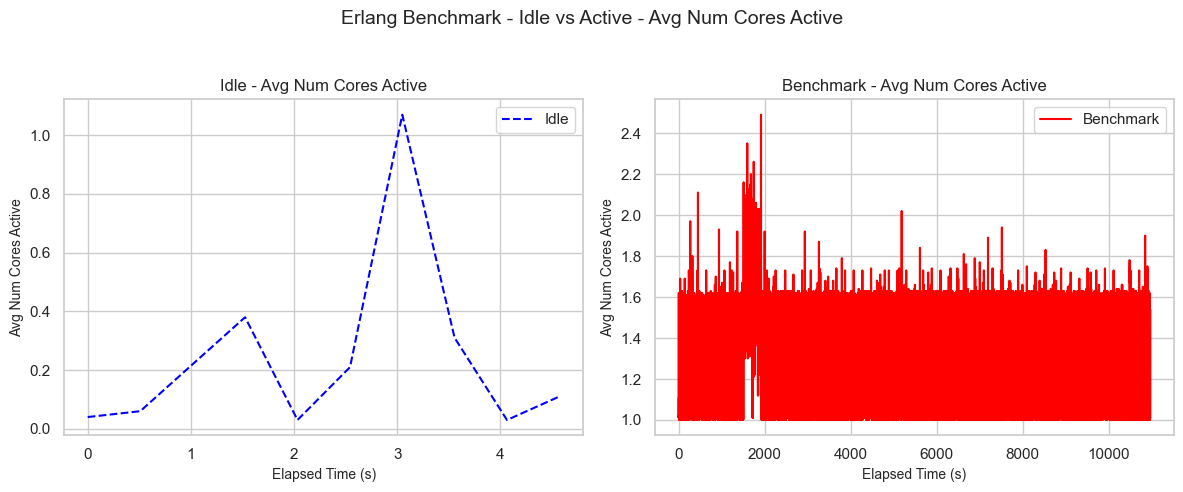

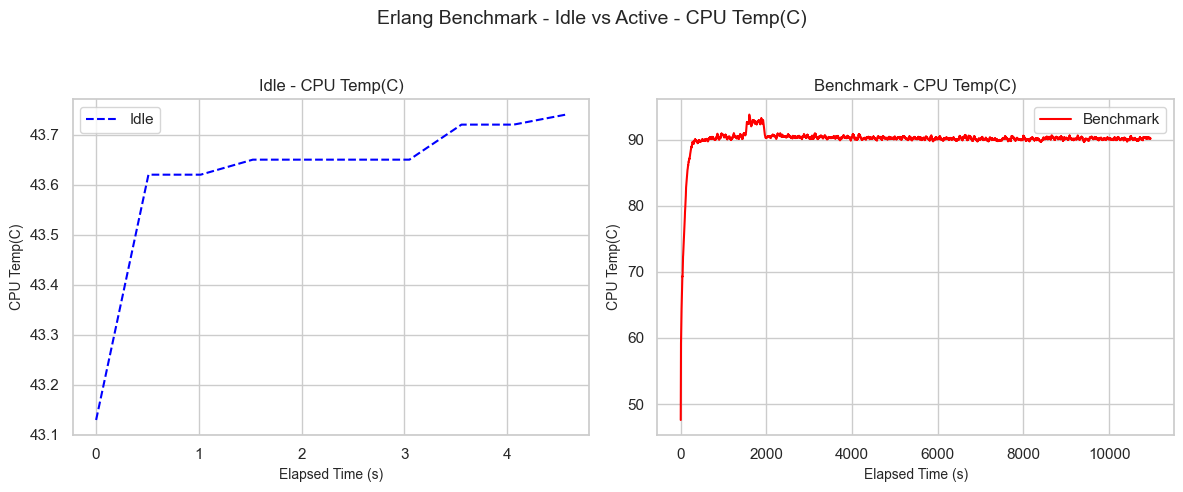

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_message_count(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg / 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg / 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg / 1_000}K"
    return str(nmsg)

message_label = format_message_count(NMSG)
title_config_prefix = f"({message_label} Messages, {ITERATIONS} Iterations)"

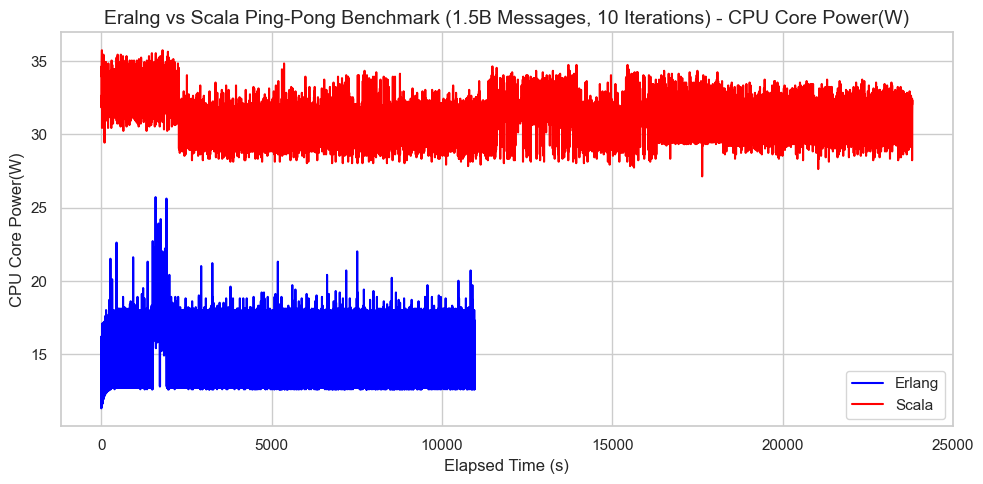

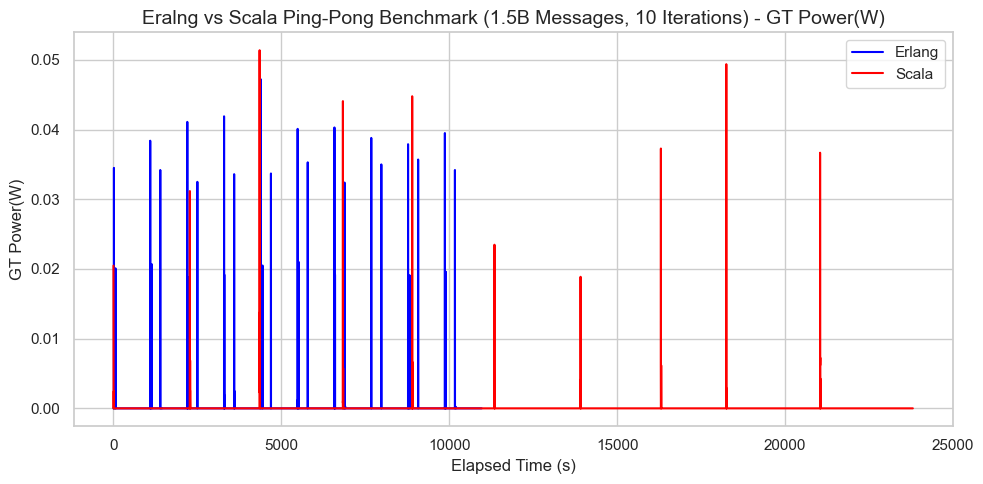

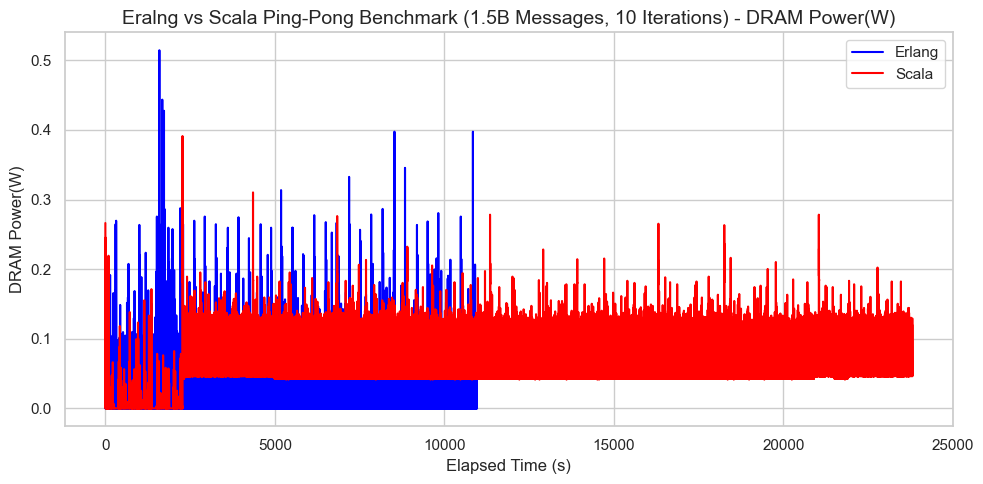

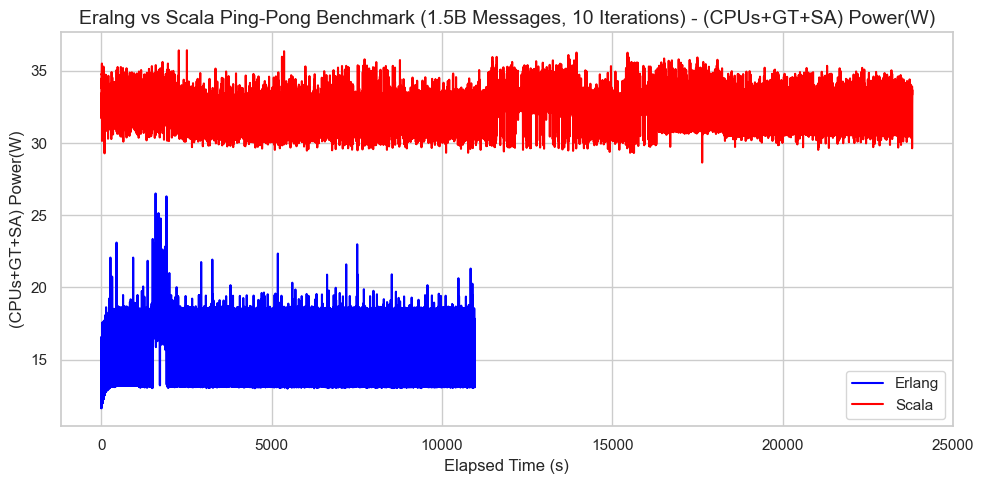

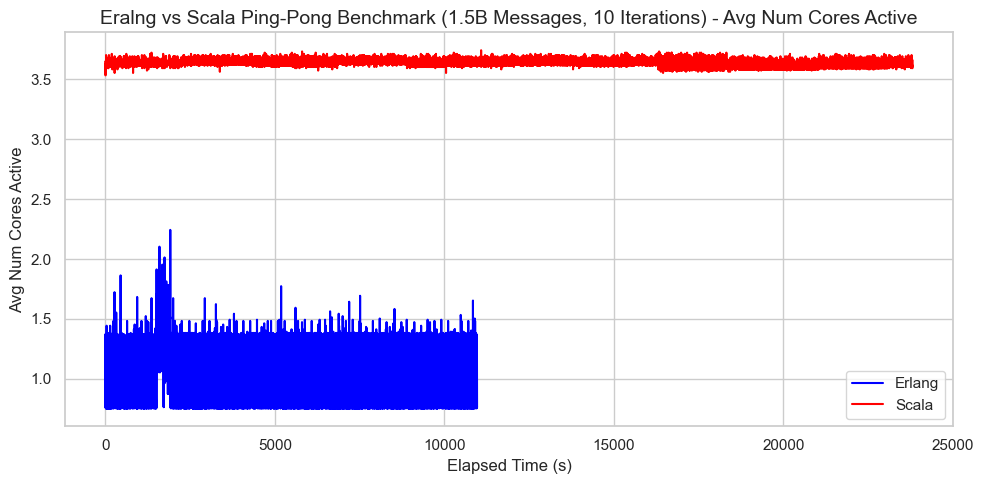

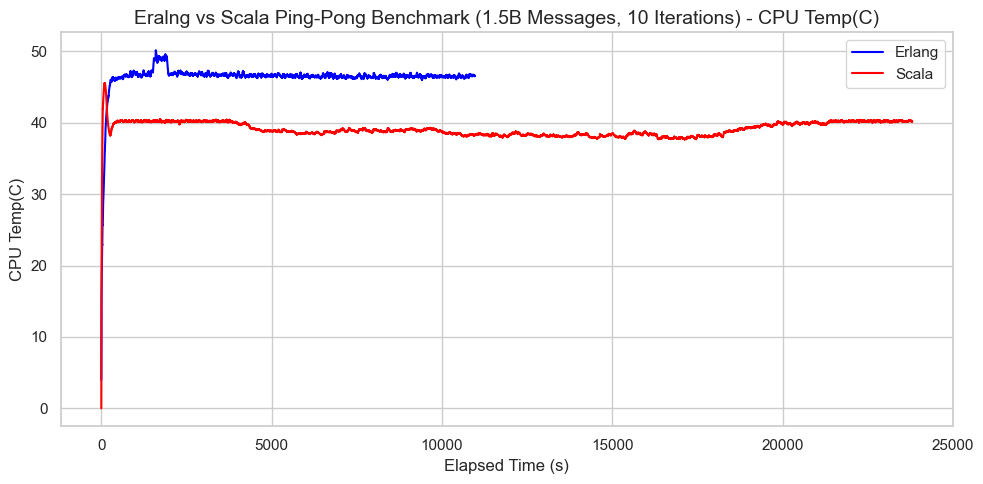

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Ping-Pong Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        31.388800
GT Power(W)              -0.031352
DRAM Power(W)             0.044218
(CPUs+GT+SA) Power(W)    32.573768
CPU Temp(C)              39.104617
Avg Num Cores Active      3.623439
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        13.575775
GT Power(W)              -0.003809
DRAM Power(W)            -0.034178
(CPUs+GT+SA) Power(W)    14.030657
CPU Temp(C)              46.428834
Avg Num Cores Active      0.858145
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Number of Messages": NMSG,
    "Iterations": ITERATIONS,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["Number of Messages"] == NMSG) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for Number of Messages =", NMSG, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/ping_pong/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 748447.6939971407 Joules
Erlang Benchmark: 148511.2739705062 Joules
